In [66]:
import pandas as pd
import torch
from NLPUtils import *
import re
import fasttext

%matplotlib notebook
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

In [56]:
with open('promptsl40.train','rb') as file:
    train_lines = file.readlines()
    train_lines = [' '.join(re.findall(r'\w+',line.decode('iso-8859-1'))[1:]) for line in train_lines]
    
with open('promptsl40.test','rb') as file:
    test_lines = file.readlines()
    test_lines = [' '.join(re.findall(r'\w+',line.decode('iso-8859-1'))[1:]) for line in test_lines]
    
corpus = train_lines + test_lines
with open('corpus.txt', 'w') as file:
    for line in corpus:
        file.write(line + '\n')
        
corpus = [line.split(' ') for line in corpus]

In [52]:
# Skipgram model :
model = fasttext.train_unsupervised('corpus.txt', model='skipgram')
model.get_nearest_neighbors('gabinete')

[(0.9999591708183289, 'responsabilidad'),
 (0.9999560117721558, 'diferencia'),
 (0.999955952167511, 'venezuela'),
 (0.9999555945396423, 'necesario'),
 (0.9999549984931946, 'necesidad'),
 (0.9999540448188782, 'referencia'),
 (0.9999539256095886, 'ministerio'),
 (0.9999536275863647, 'seguridad'),
 (0.99995356798172, 'cantidad'),
 (0.9999534487724304, 'diferencias')]

Starting training...
	Model used: SkipGram
    	Optimization method: Stochastic Gradient Descent
    	Learning Rate: 0.9
    	Number of epochs: 100
    	Number of batches: 305
    	Number of samples per batch: 128

Epoch: 1, Batch number: 0, Loss: 8.864882469177246
Epoch: 1, Batch number: 100, Loss: 8.37951374053955
Epoch: 1, Batch number: 200, Loss: 8.045660018920898
Epoch: 1, Batch number: 300, Loss: 7.985380172729492
Epoch: 2, Batch number: 95, Loss: 7.637542724609375
Epoch: 2, Batch number: 195, Loss: 7.721407890319824
Epoch: 2, Batch number: 295, Loss: 7.7375898361206055
Epoch: 3, Batch number: 90, Loss: 7.395486354827881
Epoch: 3, Batch number: 190, Loss: 7.307894229888916
Epoch: 3, Batch number: 290, Loss: 7.330568790435791
Epoch: 4, Batch number: 85, Loss: 7.1326165199279785
Epoch: 4, Batch number: 185, Loss: 7.053037166595459
Epoch: 4, Batch number: 285, Loss: 7.277877330780029
Epoch: 5, Batch number: 80, Loss: 7.3536810874938965
Epoch: 5, Batch number: 180, Loss: 6.8890819549

Epoch: 50, Batch number: 55, Loss: 4.801270484924316
Epoch: 50, Batch number: 155, Loss: 4.949641227722168
Epoch: 50, Batch number: 255, Loss: 5.119701862335205
Epoch: 51, Batch number: 50, Loss: 4.821449279785156
Epoch: 51, Batch number: 150, Loss: 5.018797874450684
Epoch: 51, Batch number: 250, Loss: 5.097501277923584
Epoch: 52, Batch number: 45, Loss: 4.682817459106445
Epoch: 52, Batch number: 145, Loss: 4.770468711853027
Epoch: 52, Batch number: 245, Loss: 4.965460777282715
Epoch: 53, Batch number: 40, Loss: 4.858813762664795
Epoch: 53, Batch number: 140, Loss: 4.738636016845703
Epoch: 53, Batch number: 240, Loss: 4.5871195793151855
Epoch: 54, Batch number: 35, Loss: 4.634847640991211
Epoch: 54, Batch number: 135, Loss: 4.6491217613220215
Epoch: 54, Batch number: 235, Loss: 4.970991134643555
Epoch: 55, Batch number: 30, Loss: 4.656458377838135
Epoch: 55, Batch number: 130, Loss: 4.726243019104004
Epoch: 55, Batch number: 230, Loss: 4.899499893188477
Epoch: 56, Batch number: 25, Los

Epoch: 100, Batch number: 105, Loss: 4.476143836975098
Epoch: 100, Batch number: 205, Loss: 4.642116546630859
Training finished



<IPython.core.display.Javascript object>


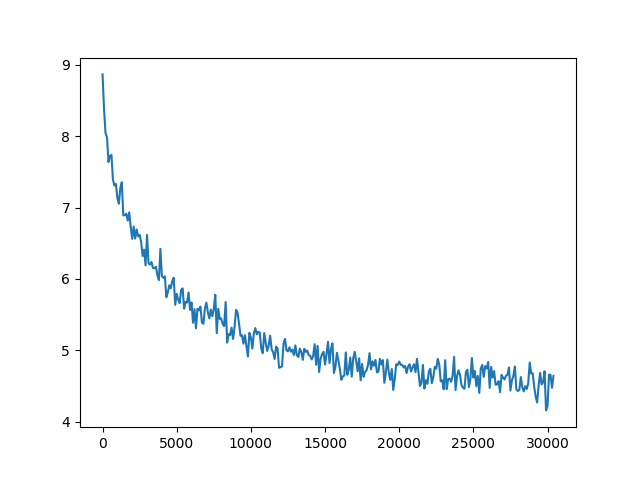

In [72]:
# Modelo de lenguaje:
method = 'SkipGram'
window_size = 2
embedding_dim = 100
pretrained = None

# Parámetros de iteración:
batch_size = 128
epochs = 100
learning_rate = 9e-1
sample_loss_every = 100
use_gpu = 1

embedding_layer, vocab, loss_history = SGDTrainWordVectors(corpus,pretrained_layer=pretrained,lm=method,window_size=window_size,batch_size=batch_size,embedding_dim=embedding_dim,use_gpu=use_gpu,epochs=epochs,learning_rate=learning_rate,sample_loss_every=sample_loss_every)
    
fig, ax = plt.subplots()
ax.plot(loss_history['iter'],loss_history['loss'])

In [ ]:
distance = torch.nn.CosineSimilarity()
